# Stochastic Differential Equation Plots ##

Run the cell below first to import the necessary libraries. The code will not work if you do not do so.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simple Drift-Diffusion #

## Equation ##
$dX_{t}=a*dt+b*dW_{t}$

## Solution ##
$X_{t}=x_{0}+at+bW_{t}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=\mathbb{E}\left(x_{0}+at+bW_{t}\right)=x_{0}+at$

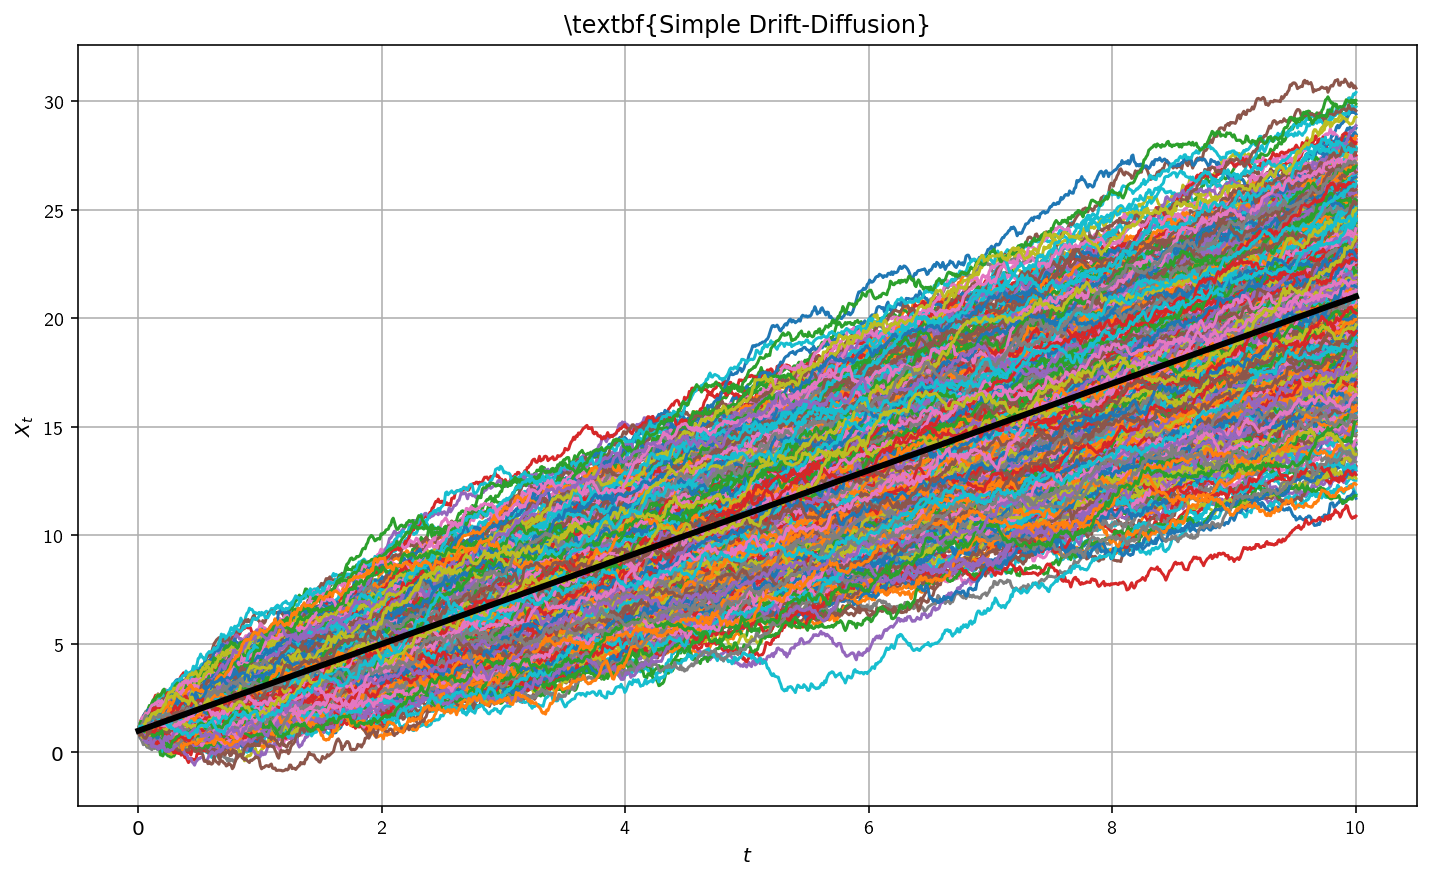

In [4]:
#1 Simple Drift-Diffusion

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 10
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 1
a = 2
b = 1

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)]) + a*t + b*w
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) + a*t
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Simple Drift-Diffusion}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 2. Geometric Brownian Motion #

## Equation ##
$dX_{t}=aX_{t}dt+bX_{t}dW_{t}$

## Solution ##
$X_{t}=X_{0}e^{t\left(a-\frac{b^{2}}{2}\right)+b\int_{0}^{t}dW_{\tau}}=X_{0}e^{t\left(a-\frac{b^{2}}{2}\right)+bW_{t}}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=X_{0}e^{t\left(a-\frac{b^{2}}{2}\right)}e^{\frac{b^{2}t}{2}}$

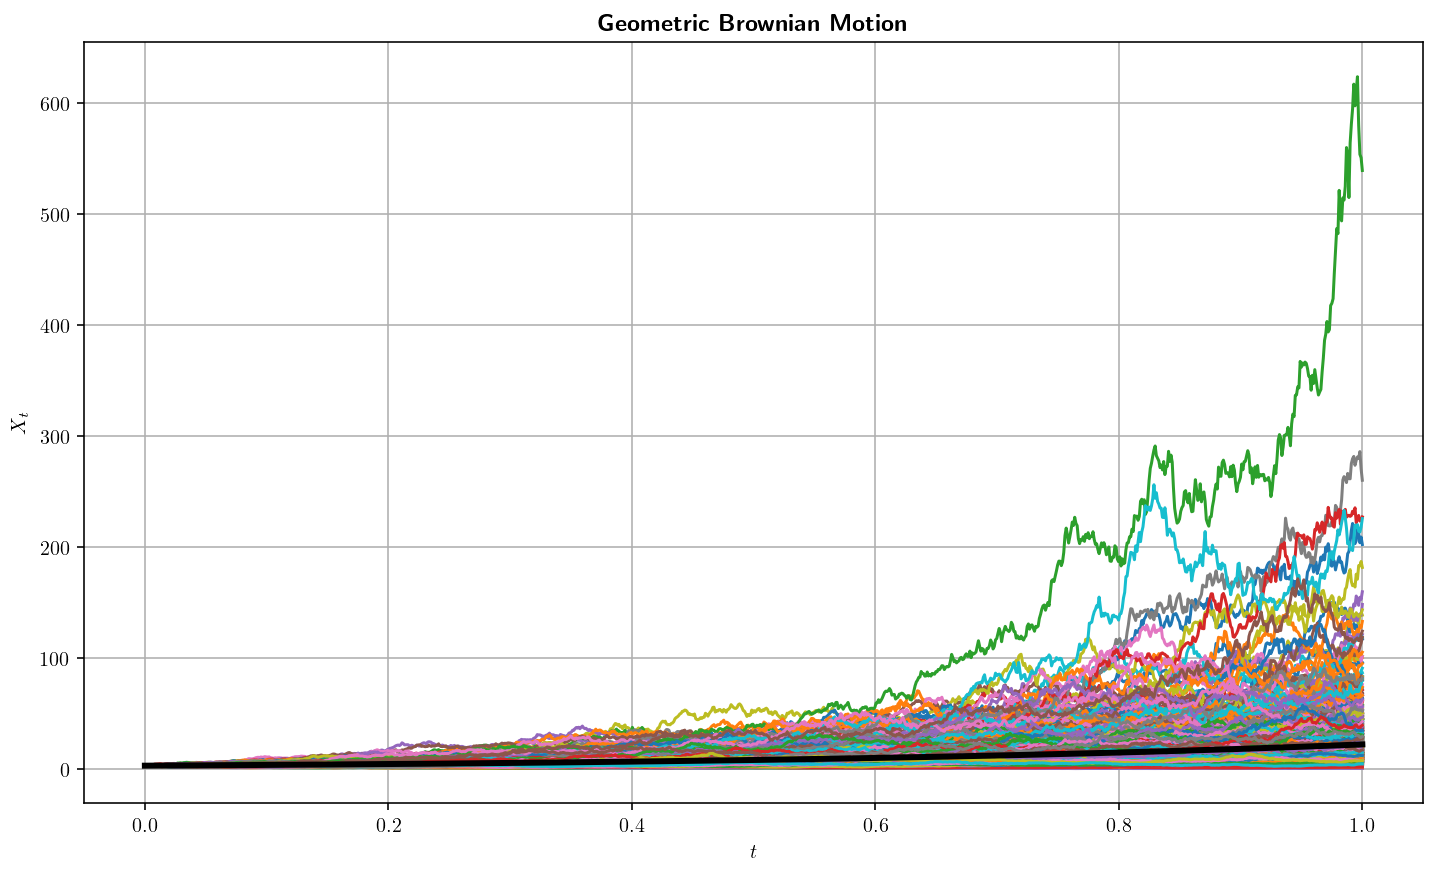

In [5]:
#2 Geometric Brownian Motion

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 1
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 3
a = 2
b = 1

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)]) * np.exp(t*(a-b**2/2)+b*w)
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * np.exp(t*(a-b**2/2)+b**2 * t/2)
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Geometric Brownian Motion}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 3. Ornstein-Uhlenbeck (OU) Process #

## Equation ##
$dX_{t}=-aX_{t}dt+bdW_{t}$

## Solution ##
$X_{t}=e^{-at}\left(X_{0}+b\int_{0}^{t}e^{a\tau}dW_{\tau}\right)$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=e^{-at}X_{0}=X_{0}e^{-at}$

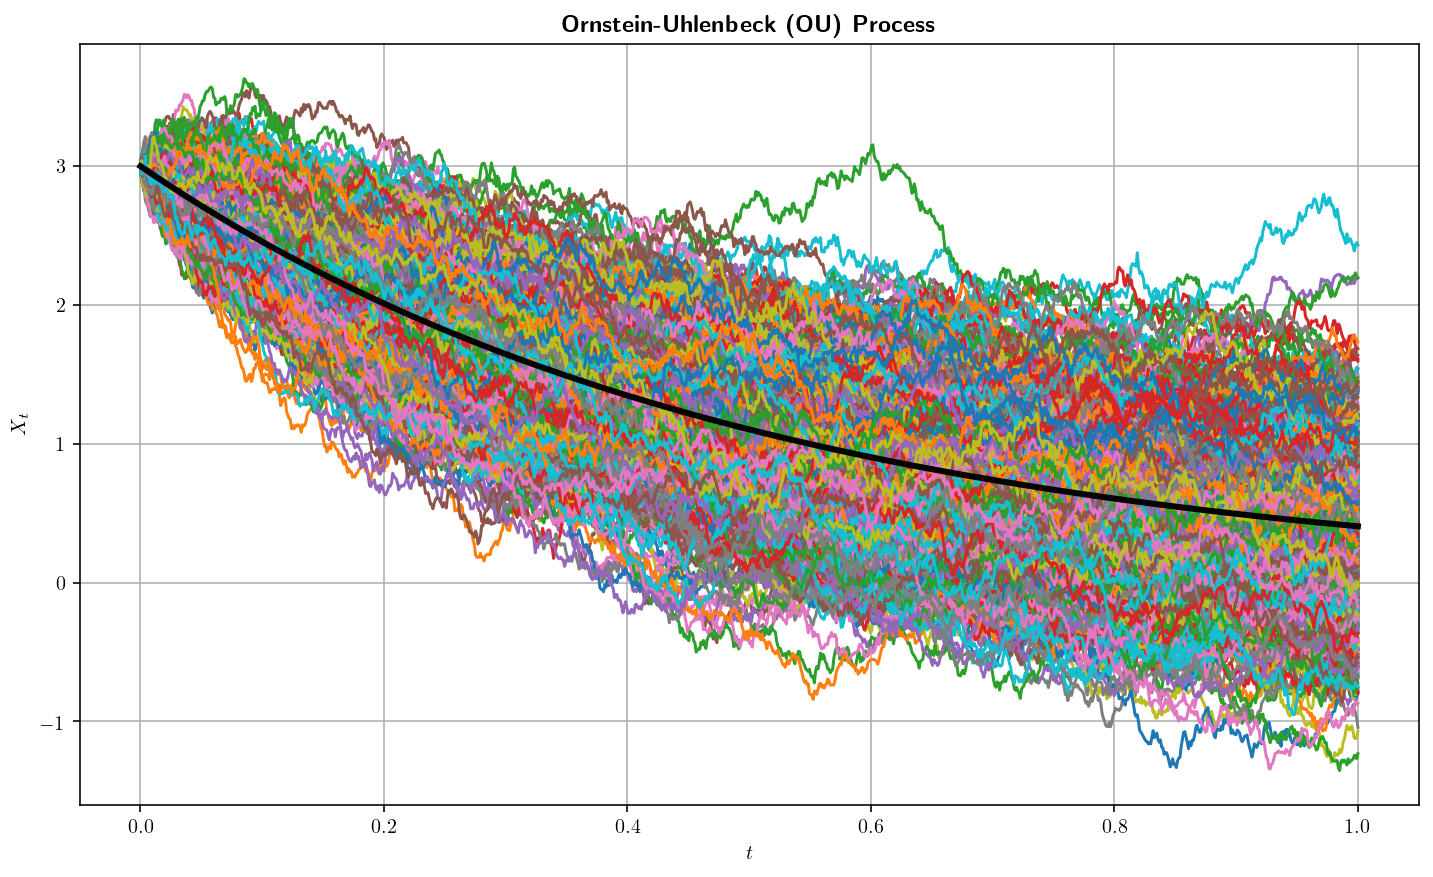

In [6]:
#3 Ornstein-Uhlenbeck (OU) Process

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 1
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 3
a = 2
b = 1

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.exp(-a*t) * (np.array([x0 for i in range(partsize)]) + b * np.cumsum(np.exp(a*t)*dw))
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * np.exp(-a*t)
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Ornstein-Uhlenbeck (OU) Process}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 4. Mean Reverting OU #

## Equation ##
$dX_{t}=\left(-aX_{t}+\theta a\right)dt+bdW_{t}$

## Solution ##
$X_{t}=X_{0}e^{-at}+\theta\left(1-e^{-at}\right)+be^{-at}\int_{0}^{t}e^{a\tau}dW_{\tau}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=X_{0}e^{-at}+\theta\left(1-e^{-at}\right)$

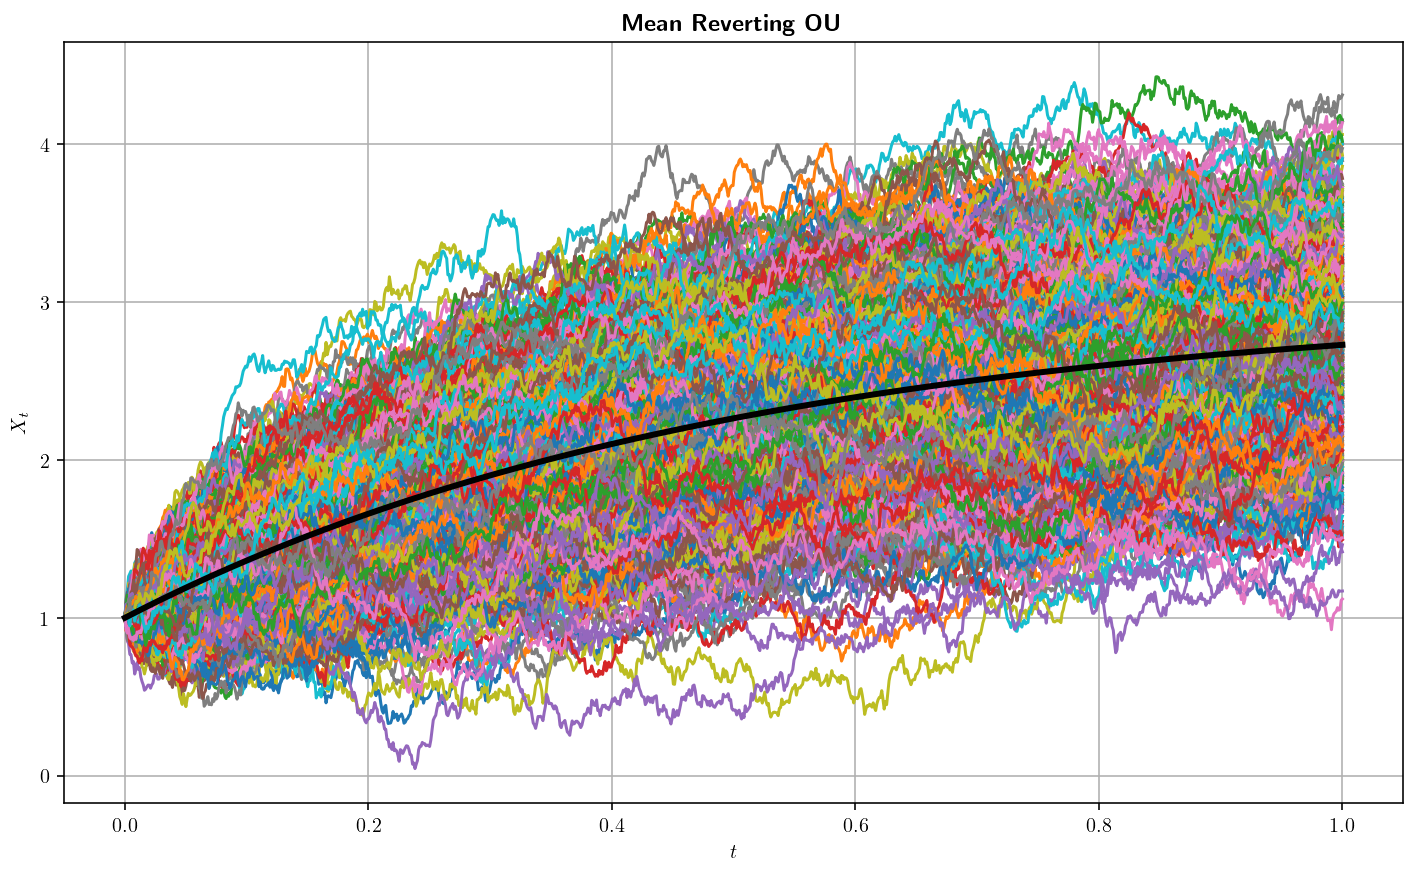

In [7]:
#4 Mean Reverting OU

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 1
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 1
a = 2
b = 1
theta = 3

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)]) * np.exp(-a*t) + theta * (1 - np.exp(-a*t)) + b * np.exp(-a*t) * np.cumsum(np.exp(a*t)*dw)
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * np.exp(-a*t) + theta * (1 - np.exp(-a*t))
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Mean Reverting OU}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 5. Brownian Bridge #

## Equation ##
$dX_{t}=\left(\frac{-1}{1-t}X_{t}+\frac{b}{1-t}\right)dt+dW_{t}$

## Solution ##
$X_{t}=X_{0}\left(1-t\right)+bt+\left(1-t\right)\int_{0}^{t}\frac{1}{1-\tau}dW_{\tau}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=X_{0}\left(1-t\right)+bt$

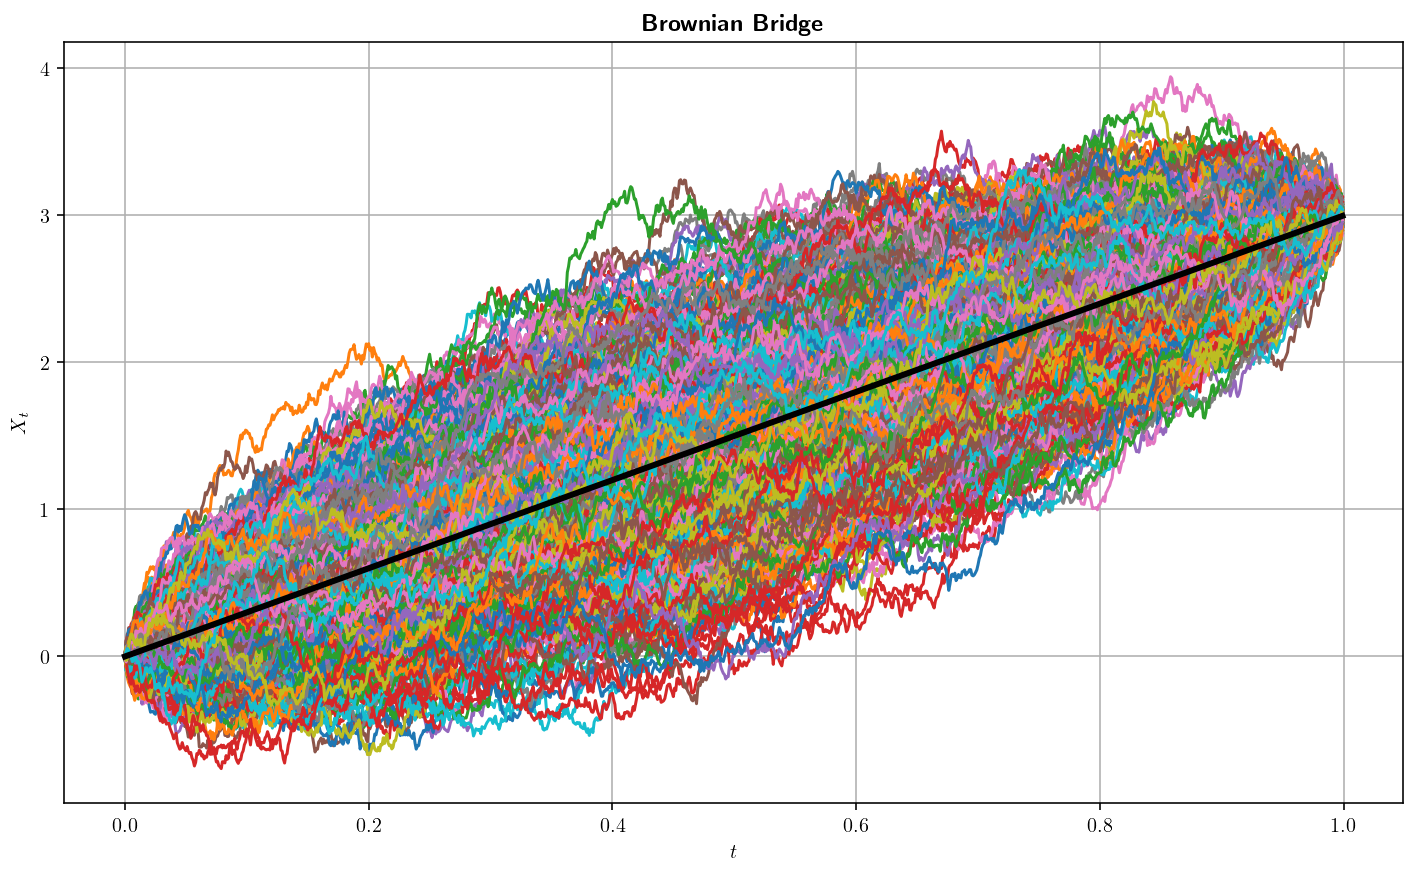

In [8]:
#5 Brownian Bridge

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 0.999
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 0
b = 3

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)]) * (1-t) + b*t + (1-t)*np.cumsum(1/(1-t)*dw)
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * (1-t) + b*t
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Brownian Bridge}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 6. Stochastic Logistic Equation #

## Equation ##
$dY_{t}=a\left(1-Y_{t}\right)Y_{t}dt+bY_{t}dW_{t}$

## Solution ##
$Y_{t}=Y_{0}e^{\left(a-\frac{b^{2}}{2}\right)t-bW_{t}}\left(1+Y_{0}a\int_{0}^{t}e^{\left(a-\frac{b^{2}}{2}\right)\tau-bW_{\tau}}d\tau\right)^{-1}$

## Expectation ##
$Y_{t}=\frac{e^{at}}{\frac{1}{Y_{0}}-1+e^{at}}$

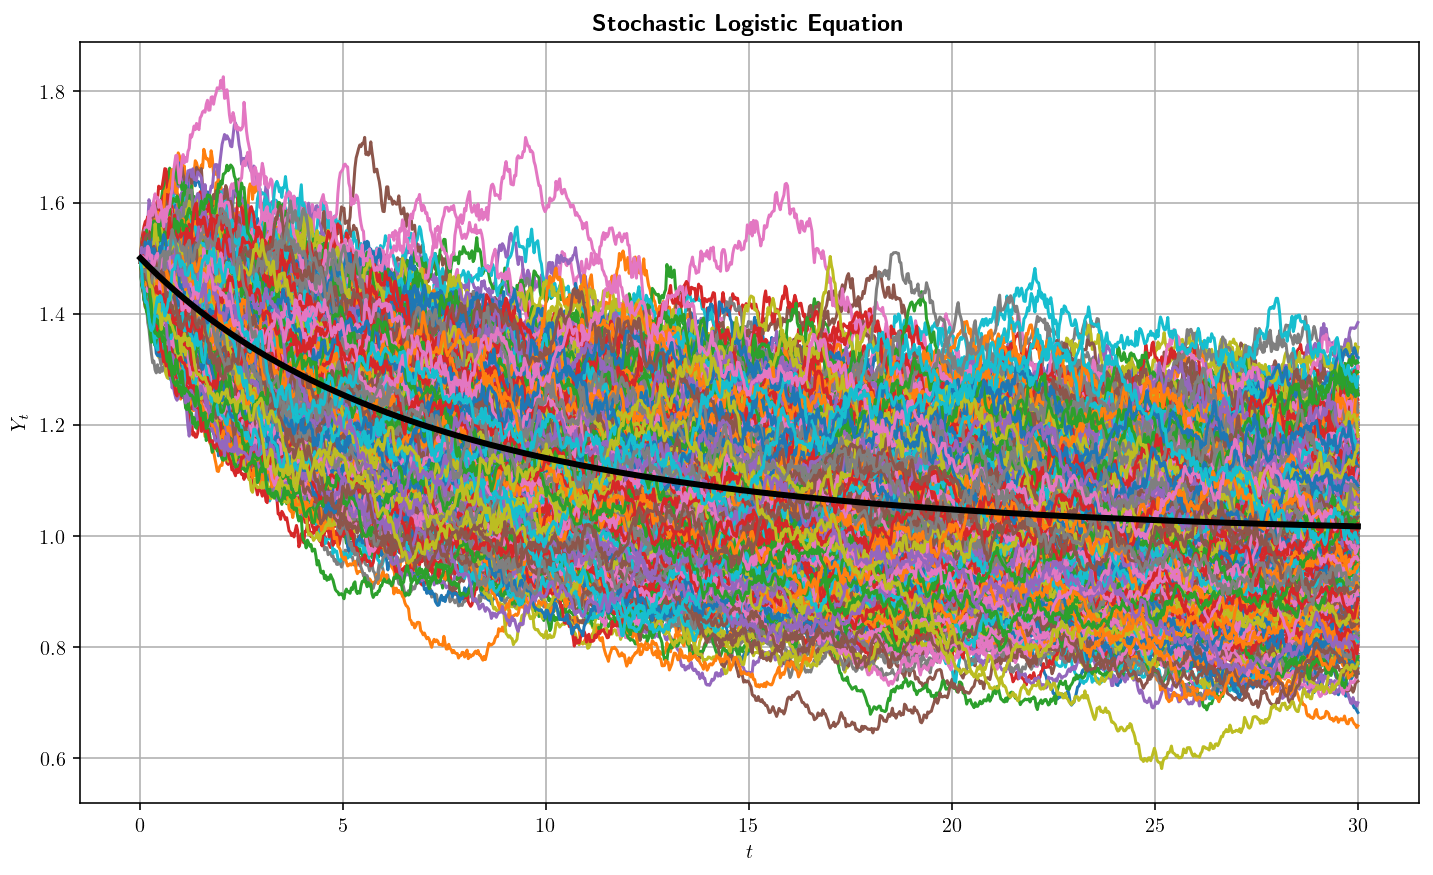

In [9]:
#6 Stochastic Logistic Equation

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 30
partsize = 1000
numsols = 1000

#The SDE conditions
y0 = 1.5
a = 0.1
b = 0.05

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.exp((a-b**2/2)*t-b*w) * (((1/np.array([y0 for i in range(partsize)]) + a * np.cumsum(np.exp((a-b**2/2)*t-b*w)*dt)))**-1)
    
    #Plot the solution
    plt.plot(t,x)

mean = np.exp(a*t) / (1/np.array([y0 for i in range(partsize)]) - 1 + np.exp(a*t))
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Stochastic Logistic Equation}')
plt.xlabel(r'$t$')
plt.ylabel(r'$Y_{t}$')
plt.grid()

plt.show()

In practice, it is useful to estimate the expectation and variance at a given time, $t$, for an SDE by running many trials. For the stochastic logistic equation, we can compare our estimated values to the actual values. The estimated curves will be in red. For the variance, it is not easy to solve the SDE to find the exact value, but we can still plot the estimate.

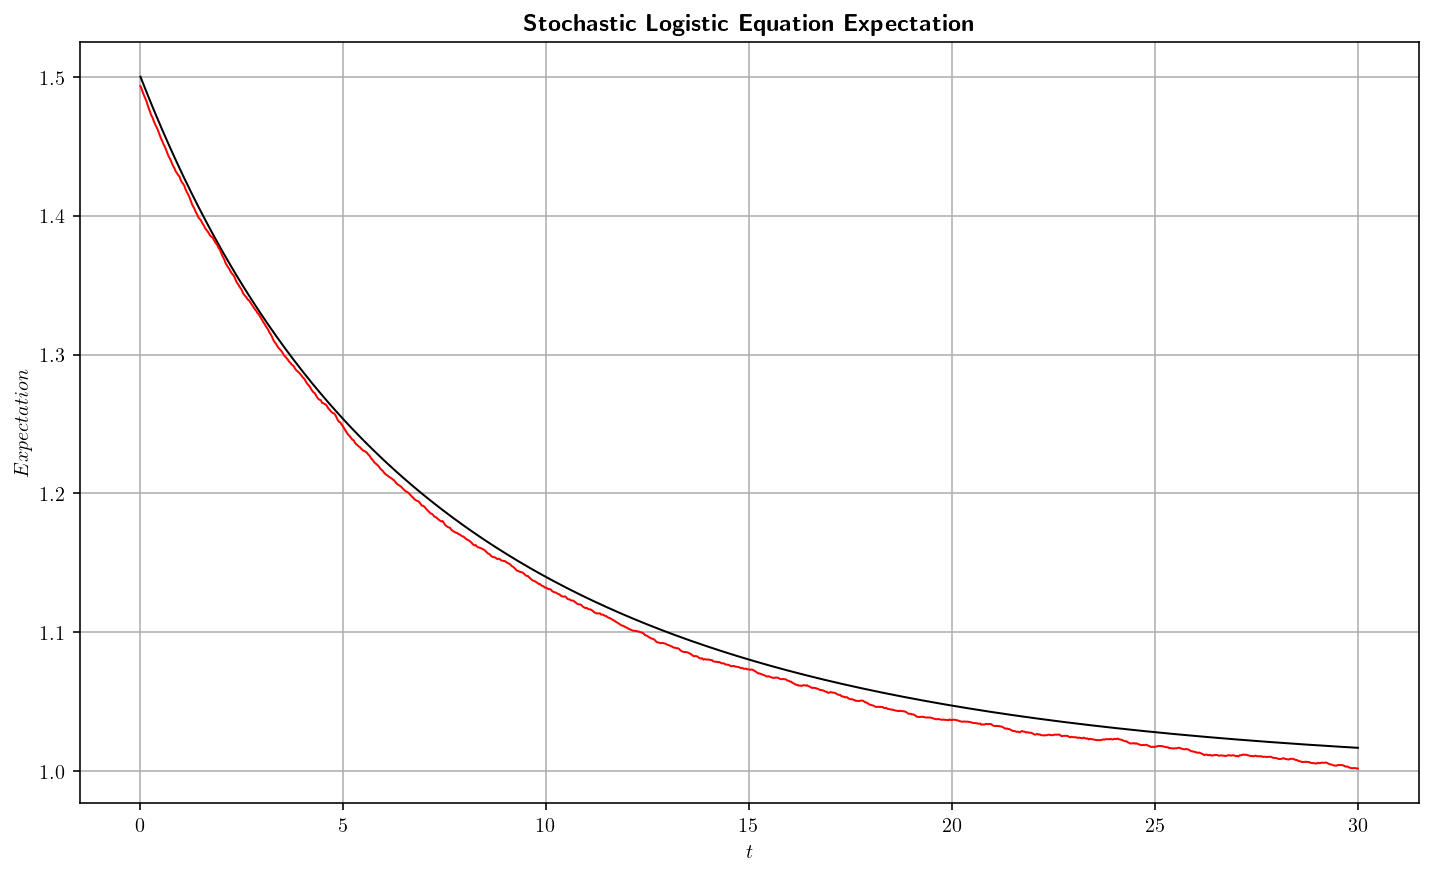

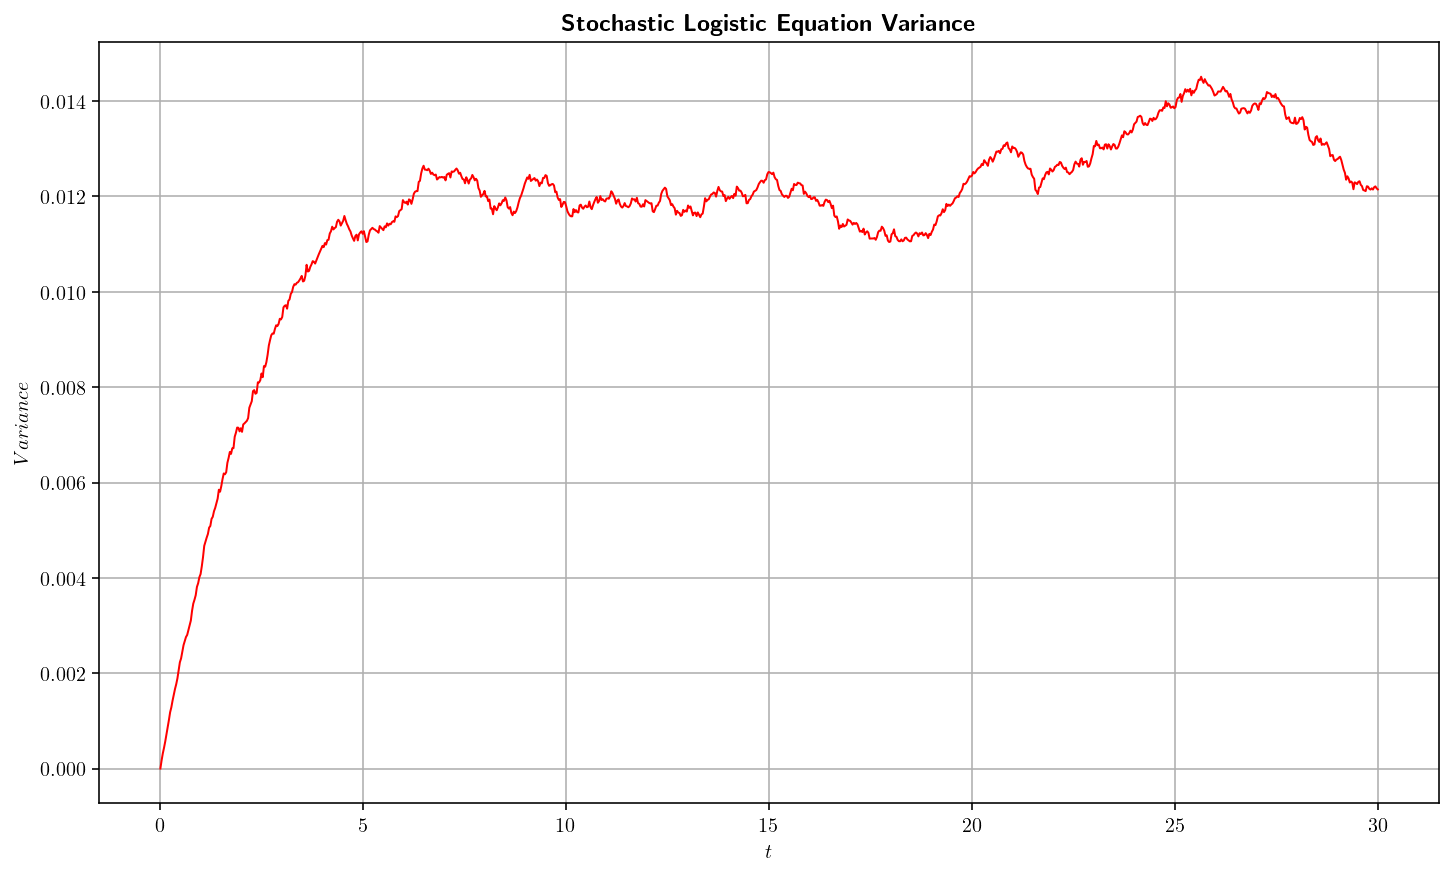

In [10]:
#6 Stochastic Logistic Equation Estimated Expectation and Variance

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 30
partsize = 1000
numsols = 1000

#Create the data array
vals = np.zeros((numsols,partsize))

#The SDE conditions
y0 = 1.5
a = 0.1
b = 0.05

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.exp((a-b**2/2)*t-b*w) * (((1/np.array([y0 for i in range(partsize)]) + a * np.cumsum(np.exp((a-b**2/2)*t-b*w)*dt)))**-1)
    
    #Ppopulate the data
    vals[i,:] = x

mean = np.exp(a*t) / (1/np.array([y0 for i in range(partsize)]) - 1 + np.exp(a*t))
meanest = np.mean(vals, axis=0)
varest = np.var(vals, axis=0)
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=1,color='black')
plt.plot(t,meanest,linewidth=1,color='red')
plt.title(r'\textbf{Stochastic Logistic Equation Expectation}')
plt.xlabel(r'$t$')
plt.ylabel(r'$Expectation$')
plt.grid()

plt.show()

plt.figure()
plt.rcParams['text.usetex'] = True
plt.plot(t,varest,linewidth=1,color='red')
plt.title(r'\textbf{Stochastic Logistic Equation Variance}')
plt.xlabel(r'$t$')
plt.ylabel(r'$Variance$')
plt.grid()

plt.show()

# 7. Geometric Mean Reverting Processes #

## Equation ##
$dX_{t}=k\left(\theta-\ln\left(X_{t}\right)\right)X_{t}dt+\sigma X_{t}dW_{t}$

## Solution ##
$X_{t}=X_{0}e^{e^{-kt}+\left(\theta-\frac{\sigma^{2}}{2k}\right)\left(1-e^{-kt}\right)+\sigma e^{-kt}\int_{0}^{t}e^{k\tau}dW_{\tau}}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=X_{0}e^{e^{-kt}+\left(\theta-\frac{\sigma^{2}}{2k}\right)\left(1-e^{-kt}\right)}e^{\frac{\sigma^{4}\left(1-e^{-2kt}\right)^{2}}{8k^{2}}}$

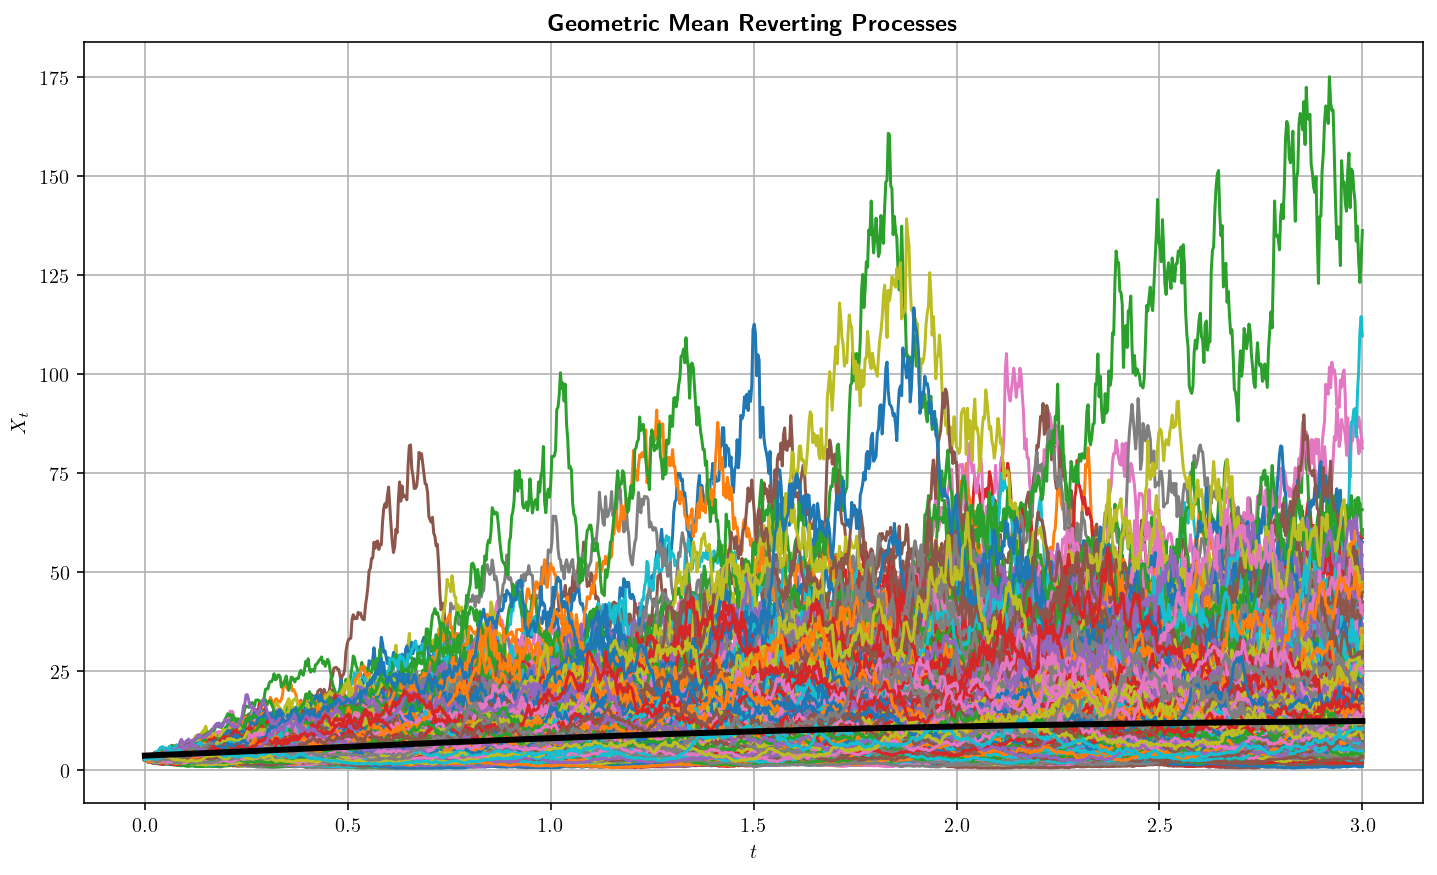

In [11]:
#7 Geometric Mean Reverting Processes

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 3
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 1
sigma = 1
theta = 3
k = 1

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)]) * np.exp(np.exp(-k*t) + (theta-sigma**2/(2*k)) * (1-np.exp(-k*t)) + sigma*np.exp(-k*t)*np.cumsum(np.exp(k*t)*dw))
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * (np.exp(np.exp(-k*t) + (theta-sigma**2/(2*k)) * (1-np.exp(-k*t)) ) + np.exp((sigma**4*(1-np.exp(-2*k*t))**2)/(8*k**2)))
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{Geometric Mean Reverting Processes}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

# 8 CIR Process #

## Equation ##
$dX_{t}=k\left(\theta-X_{t}\right)dt+\sigma\sqrt{X_{t}}dW_{t}$

## Solution ##
$X_{t}=X_{0}e^{-kt}+\theta\left(1-e^{-kt}\right)+e^{-kt}\int_{0}^{t}\sigma e^{k\tau}\sqrt{X_{\tau}}dW_{\tau}$

## Expectation ##
$\mathbb{E}\left(X_{t}\right)=X_{0}e^{-kt}+\theta\left(1-e^{-kt}\right)$

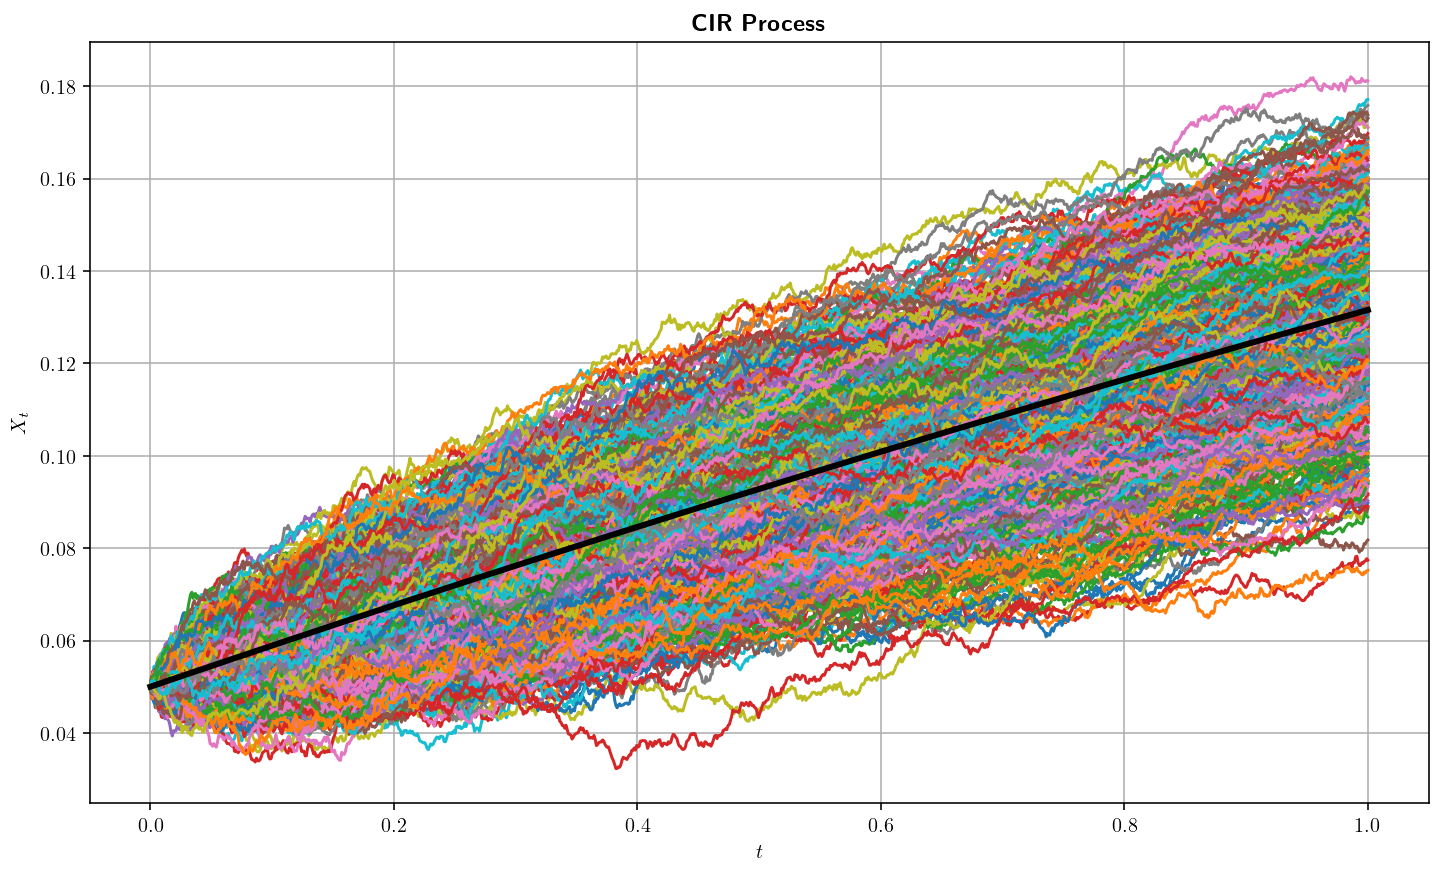

In [12]:
#8 CIR Process

#Create the t and w vectors

#The starting parameters
t0 = 0
T = 1
partsize = 1000
numsols = 1000

#The SDE conditions
x0 = 0.05
sigma = 0.1
theta = 0.5
k = 0.2

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)])
    x = np.array([x0 for i in range(partsize)]) * np.exp(-k*t) + theta * (1 - np.exp(-k*t)) + np.exp(-k*t)*np.cumsum(sigma*np.exp(-k*t)*np.sqrt(x)*dw)
    
    
    #Plot the solution
    plt.plot(t,x)

mean = np.array([x0 for i in range(partsize)]) * np.exp(-k*t) + theta * (1 - np.exp(-k*t))
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=3,color='black')
plt.title(r'\textbf{CIR Process}')
plt.xlabel(r'$t$')
plt.ylabel(r'$X_{t}$')
plt.grid()

plt.show()

Once again, we will estimate the expectation and variance.

In [0]:
#8 CIR Estimated Expectation and Variance

#Create the t and w vectors

t0 = 0
T = 2
partsize = 1000
numsols = 1000

#Create the data array
vals = np.zeros((numsols,partsize))

#The SDE conditions
x0 = 5
sigma = 1
theta = 3
k = 1

t = np.linspace(t0,T,partsize)
dt = t[1]-t[0]

for i in range(numsols):
    #As we have a Wiener Process
    dw = [np.sqrt(dt)*np.random.normal() for i in range(partsize-1)]
    dw = np.insert(dw, 0, 0)
    w = np.cumsum(dw)

    #The solution to our SDE
    x = np.array([x0 for i in range(partsize)])
    x = np.array([x0 for i in range(partsize)]) * np.exp(-k*t) + theta * (1 - np.exp(-k*t)) + np.exp(-k*t)*np.cumsum(sigma*np.exp(-k*t)*np.sqrt(x)*dw)
    
    #Ppopulate the data
    vals[i,:] = x

mean = np.array([x0 for i in range(partsize)]) * np.exp(-k*t) + theta * (1 - np.exp(-k*t))
meanest = np.mean(vals, axis=0)
varest = np.var(vals, axis=0)
plt.rcParams['text.usetex'] = True
plt.plot(t,mean,linewidth=1,color='black')
plt.plot(t,meanest,linewidth=1,color='red')
plt.title(r'\textbf{CIR Expectation}')
plt.xlabel(r'$t$')
plt.ylabel(r'$Expectation$')
plt.grid()

plt.show()

plt.figure()
plt.rcParams['text.usetex'] = True
plt.plot(t,varest,linewidth=1,color='red')
plt.title(r'\textbf{CIR Variance}')
plt.xlabel(r'$t$')
plt.ylabel(r'$Variance$')
plt.grid()

plt.show()